In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point # Import Point explicitly

#library for nearest neighbour analysis
from scipy.spatial import distance_matrix

In [ ]:
data = gpd.read_file("/content/Covid19_Testing_Labs.shp")
data

,id,NAME,Address,District,Test Type,FullAddres,Lab Type,Latitude,Longitude,geometry
0,1,Avitis Super Specialty Hospitals Private Limited,Avitis Super Specialty Hospitals Private Limit...,Palakkad,TRUENAT,None,Private Lab,10.590414,76.580284,POINT (76.58028 10.59041)
1,1,DDRC SRL Diagnostics Pvt Ltd,Panampilly Nagar,Ernakulam,RT-PCR,None,Private Lab,9.955541,76.296550,POINT (76.29655 9.95554)
2,1,Kinder Womens Hospital and Fertility Centre,Kinder Womens Hospital and Fertility Centre C...,Alappuzha,ANTIGEN,Kinder Womens Hospital and Fertility Centre C...,Private Lab,9.663174,76.341274,POINT (76.34127 9.66317)
3,1,National Institute of Virology,"National Institute of Virology, Field Unit, Al...",Allapuzha,RT-PCR,None,Govt Lab,9.418518,76.341011,POINT (76.34101 9.41852)
4,1,None,Amrita Institute of Medical Science Kochi,Ernakulam,XPERT,Amrita Institute of Medical Science,Private Lab,10.033104,76.292256,POINT (76.29226 10.0331)
...,...,...,...,...,...,...,...,...,...,...
621,511,Metro Scans,Metro Scans Kailas Arcad District Hospital Ro...,Kollam,ANTIGEN,Metro Scans Kailas Arcad District Hospital Ro...,Private Lab,8.895683,76.600777,POINT (76.60078 8.89568)
622,513,Metro scans,Metro scans Bhavani Trade Centre. High School...,Kollam,ANTIGEN,Metro scans Bhavani Trade Centre. High School...,Private Lab,8.960836,76.914402,POINT (76.9144 8.96084)
623,514,Bio Lab Clinical laboratory,Bio Lab Clinical laboratory Modern Tower Man...,Kozhikode,ANTIGEN,Bio Lab Clinical laboratory Modern Tower Man...,Private Lab,11.332532,75.918834,POINT (75.91883 11.33253)
624,515,Western Hospital and Nursing Home,Western Hospital and Nursing Home Opp. Malaba...,Kozhikode,ANTIGEN,Western Hospital and Nursing Home Opp. Malaba...,Private Lab,11.557424,75.763633,POINT (75.76363 11.55742)


In [ ]:
data.isnull().sum()
#Here there are no null values in this dataset so we dont have to remove NAN values

,0
id,0
NAME,18
Address,0
District,0
Test Type,0
FullAddres,94
Lab Type,0
Latitude,0
Longitude,0
geometry,0


In [ ]:
#Removes rows with any NAN values in any columns
df = data.dropna()
df.isnull().sum()

,0
id,0
NAME,0
Address,0
District,0
Test Type,0
FullAddres,0
Lab Type,0
Latitude,0
Longitude,0
geometry,0


In [ ]:
df

,id,NAME,Address,District,Test Type,FullAddres,Lab Type,Latitude,Longitude,geometry
2,1,Kinder Womens Hospital and Fertility Centre,Kinder Womens Hospital and Fertility Centre C...,Alappuzha,ANTIGEN,Kinder Womens Hospital and Fertility Centre C...,Private Lab,9.663174,76.341274,POINT (76.34127 9.66317)
6,2,Health Park Medical Centre,Health Park Medical Centre Alappuzha,Alappuzha,ANTIGEN,Health Park Medical Centre Alappuzha,Private Lab,9.491266,76.336663,POINT (76.33666 9.49127)
13,3,Sankar's Healthcare Scans & Diagnostics,Sankar's Healthcare Scans & Diagnostics Kanna...,Alappuzha,ANTIGEN,Sankar's Healthcare Scans & Diagnostics Kanna...,Private Lab,10.315467,76.330781,POINT (76.33078 10.31547)
18,4,Providence Hospital,Providence Hospital Thumpoly Alappuzha,Alappuzha,ANTIGEN,Providence Hospital Thumpoly Alappuzha Alap...,Private Lab,9.526216,76.327767,POINT (76.32777 9.52622)
21,5,Metro Diagnostic Centre,Metro Diagnostic Centre AVA Sona Tower Near G...,Alappuzha,ANTIGEN,Metro Diagnostic Centre AVA Sona Tower Near G...,Private Lab,9.452173,76.415145,POINT (76.41514 9.45217)
...,...,...,...,...,...,...,...,...,...,...
621,511,Metro Scans,Metro Scans Kailas Arcad District Hospital Ro...,Kollam,ANTIGEN,Metro Scans Kailas Arcad District Hospital Ro...,Private Lab,8.895683,76.600777,POINT (76.60078 8.89568)
622,513,Metro scans,Metro scans Bhavani Trade Centre. High School...,Kollam,ANTIGEN,Metro scans Bhavani Trade Centre. High School...,Private Lab,8.960836,76.914402,POINT (76.9144 8.96084)
623,514,Bio Lab Clinical laboratory,Bio Lab Clinical laboratory Modern Tower Man...,Kozhikode,ANTIGEN,Bio Lab Clinical laboratory Modern Tower Man...,Private Lab,11.332532,75.918834,POINT (75.91883 11.33253)
624,515,Western Hospital and Nursing Home,Western Hospital and Nursing Home Opp. Malaba...,Kozhikode,ANTIGEN,Western Hospital and Nursing Home Opp. Malaba...,Private Lab,11.557424,75.763633,POINT (75.76363 11.55742)


In [ ]:
#Create geomtry  column from lat/long
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df = df.dropna(subset=['Longitude', 'Latitude'])
geometry = [Point(xy) for xy in zip(df['Longitude'],df['Latitude'])]
#---Convert to GeoDataFrame
gdf =  gpd.GeoDataFrame(df,geometry=geometry)
# Set the coordinate reference system (CRS) to WGS84
gdf.set_crs(epsg=4326, inplace=True)

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,NAME,Address,District,Test Type,FullAddres,Lab Type,Latitude,Longitude,geometry
2,1,Kinder Womens Hospital and Fertility Centre,Kinder Womens Hospital and Fertility Centre C...,Alappuzha,ANTIGEN,Kinder Womens Hospital and Fertility Centre C...,Private Lab,9.663174,76.341274,POINT (76.34127 9.66317)
6,2,Health Park Medical Centre,Health Park Medical Centre Alappuzha,Alappuzha,ANTIGEN,Health Park Medical Centre Alappuzha,Private Lab,9.491266,76.336663,POINT (76.33666 9.49127)
13,3,Sankar's Healthcare Scans & Diagnostics,Sankar's Healthcare Scans & Diagnostics Kanna...,Alappuzha,ANTIGEN,Sankar's Healthcare Scans & Diagnostics Kanna...,Private Lab,10.315467,76.330781,POINT (76.33078 10.31547)
18,4,Providence Hospital,Providence Hospital Thumpoly Alappuzha,Alappuzha,ANTIGEN,Providence Hospital Thumpoly Alappuzha Alap...,Private Lab,9.526216,76.327767,POINT (76.32777 9.52622)
21,5,Metro Diagnostic Centre,Metro Diagnostic Centre AVA Sona Tower Near G...,Alappuzha,ANTIGEN,Metro Diagnostic Centre AVA Sona Tower Near G...,Private Lab,9.452173,76.415145,POINT (76.41514 9.45217)
...,...,...,...,...,...,...,...,...,...,...
621,511,Metro Scans,Metro Scans Kailas Arcad District Hospital Ro...,Kollam,ANTIGEN,Metro Scans Kailas Arcad District Hospital Ro...,Private Lab,8.895683,76.600777,POINT (76.60078 8.89568)
622,513,Metro scans,Metro scans Bhavani Trade Centre. High School...,Kollam,ANTIGEN,Metro scans Bhavani Trade Centre. High School...,Private Lab,8.960836,76.914402,POINT (76.9144 8.96084)
623,514,Bio Lab Clinical laboratory,Bio Lab Clinical laboratory Modern Tower Man...,Kozhikode,ANTIGEN,Bio Lab Clinical laboratory Modern Tower Man...,Private Lab,11.332532,75.918834,POINT (75.91883 11.33253)
624,515,Western Hospital and Nursing Home,Western Hospital and Nursing Home Opp. Malaba...,Kozhikode,ANTIGEN,Western Hospital and Nursing Home Opp. Malaba...,Private Lab,11.557424,75.763633,POINT (75.76363 11.55742)


In [ ]:
gdf =  gdf.to_crs(epsg=32643)
gdf.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
gdf

,id,NAME,Address,District,Test Type,FullAddres,Lab Type,Latitude,Longitude,geometry
2,1,Kinder Womens Hospital and Fertility Centre,Kinder Womens Hospital and Fertility Centre C...,Alappuzha,ANTIGEN,Kinder Womens Hospital and Fertility Centre C...,Private Lab,9.663174,76.341274,POINT (647159.234 1068461.317)
6,2,Health Park Medical Centre,Health Park Medical Centre Alappuzha,Alappuzha,ANTIGEN,Health Park Medical Centre Alappuzha,Private Lab,9.491266,76.336663,POINT (646727.051 1049448.163)
13,3,Sankar's Healthcare Scans & Diagnostics,Sankar's Healthcare Scans & Diagnostics Kanna...,Alappuzha,ANTIGEN,Sankar's Healthcare Scans & Diagnostics Kanna...,Private Lab,10.315467,76.330781,POINT (645717.092 1140595.035)
18,4,Providence Hospital,Providence Hospital Thumpoly Alappuzha,Alappuzha,ANTIGEN,Providence Hospital Thumpoly Alappuzha Alap...,Private Lab,9.526216,76.327767,POINT (645735.56 1053309.5)
21,5,Metro Diagnostic Centre,Metro Diagnostic Centre AVA Sona Tower Near G...,Alappuzha,ANTIGEN,Metro Diagnostic Centre AVA Sona Tower Near G...,Private Lab,9.452173,76.415145,POINT (655361.309 1045158.919)
...,...,...,...,...,...,...,...,...,...,...
621,511,Metro Scans,Metro Scans Kailas Arcad District Hospital Ro...,Kollam,ANTIGEN,Metro Scans Kailas Arcad District Hospital Ro...,Private Lab,8.895683,76.600777,POINT (676019.851 983699.521)
622,513,Metro scans,Metro scans Bhavani Trade Centre. High School...,Kollam,ANTIGEN,Metro scans Bhavani Trade Centre. High School...,Private Lab,8.960836,76.914402,POINT (710479.657 991070.174)
623,514,Bio Lab Clinical laboratory,Bio Lab Clinical laboratory Modern Tower Man...,Kozhikode,ANTIGEN,Bio Lab Clinical laboratory Modern Tower Man...,Private Lab,11.332532,75.918834,POINT (600266.76 1252906.05)
624,515,Western Hospital and Nursing Home,Western Hospital and Nursing Home Opp. Malaba...,Kozhikode,ANTIGEN,Western Hospital and Nursing Home Opp. Malaba...,Private Lab,11.557424,75.763633,POINT (583263.82 1277726.384)


<Axes: >

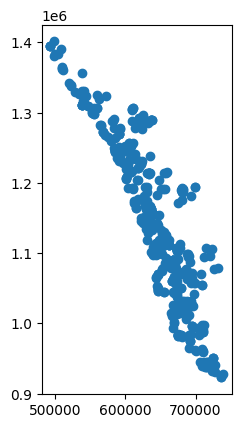

In [ ]:
gdf.plot()

In [ ]:
data2 =  gdf.to_file("CovidLabs.shp")

In [ ]:
def average_nearest_neighbour(points,area):
  #Calculate the distance matrix
  dist_matrix=distance_matrix(points,points)
  #Replace diagonal(distance to self)with infinity so it's not considered in np.min
  np.fill_diagonal(dist_matrix, np.inf)
  #Find the minimum distrance for each point
  min_distances=np.min(dist_matrix,axis=1)
  #Calculate the observed mean distance
  observed_mean_distance= np.mean(min_distances)
  #Calculate the nearest neighbour index
  nearest_neighbour_index=observed_mean_distance/ expected_mean_distance
  #Calculate the Z-Score
  density=len(points)/area
  se=0.26136/np.sqrt(len(points)*density)
  z_score=(observed_mean_distance-expected_mean_distance)/se
  return observed_mean_distance,expected_mean_distance,nearest_neighbour_index,len(points),z_score

In [ ]:
#Get coordinates from geometry column
X= np.array([[geom.x,geom.y] for geom in gdf.geometry])
# bound_area = boundary.geometry.union_all().area #in square metres

dt_points = np.array(X)
# observed_mean_distance,expected_mean_distance,nearest_neighbour_index,num_points,z_score = average_nearest_neighbour(dt_points,bound_area)
# print(f"observed mean distance:{observed_mean_distance}")
# print(f"Expected mean distance:{expected_mean_distance}")
# print(f"Nearest neighbour index:{nearest_neighbour_index}")
# print(f"Number of points:{num_points}")
# print(f"Z-score:{z_score}")

# if(nearest_neighbor_index<1):
#   print ("The point are clustered")
# else:
#   print("The points are dispersed")

Kernel Density Estimation

In [ ]:
#library for plotting on map
import folium
from folium.plugins import HeatMap
#library for kernal density
from sklearn.neighbors import KernelDensity

In [ ]:
#same steps as in the above
#Extract the latitude and longitude into 'latlon'
gdf['Latitude'] = pd.to_numeric(gdf['Latitude'], errors='coerce')
gdf['Longitude'] = pd.to_numeric(gdf['Longitude'], errors='coerce')
gdf = gdf.dropna(subset=['Latitude', 'Longitude'])

latlon = np.array([[geom.x,geom.y] for geom in gdf.geometry])
#calculate Kernal  density estimation
kde = KernelDensity(bandwidth=0.01,kernel='gaussian')
kde.fit(latlon)
densities = np.exp(kde.score_samples(latlon))
#Create a Dataframe containing latitudes.longitudes and calculated densities
result_df = pd.DataFrame({'Latitude' : gdf['Latitude'],'Longitude': gdf['Longitude'],'Density': densities})

# save result to csv file
#result_df.to_csv('density.csv', index = False) # Corrected filename

#create a folium map

center = [np.mean(gdf['Latitude']),np.mean(gdf['Longitude'])] # Corrected variable name and typo
m = folium.Map(location=center)

#create a heatmap layer from point densities and add it to folium map
heatmap_layer = HeatMap(list(zip(gdf['Latitude'],gdf['Longitude'], densities)), radius=15) # Corrected list creation
m.add_child(heatmap_layer)
display(m) # Display the map